In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("train.csv")

In [7]:
#This function will modify the dataset and remove pre-decieded features
def modify_dataset(data):
    
    #Delete the following columns
    data.drop('GarageArea', axis = 1)
    data.drop('BsmtHalfBath', axis = 1)
    data.drop('MiscVal', axis = 1)
    data.drop('MoSold', axis = 1)
    data.drop('YrSold', axis = 1)
    data.drop('BsmtFinSF2', axis = 1)
    data.drop('LowQualFinSF', axis = 1)
    data.drop('3SsnPorch', axis = 1)
    data.drop('Utilities', axis = 1)
    data.drop('Exterior2nd', axis = 1)
    
    #Combine GarageCars == 3 and GarageCars == 4
    data.GarageCars = data.GarageCars.map(lambda x: 3 if (x == 4) else x)
    
    #Fill Nans in GarageYrBlt with median year
    data.GarageYrBlt = data.GarageYrBlt.fillna(data.GarageYrBlt.median())

    #Combine KitchenAbvGr 1 and 0 AND 2 and 3 such that it is binary
    data.KitchenAbvGr = data.KitchenAbvGr.map(lambda x: 0 if (x == 1) else x)
    data.KitchenAbvGr = data.KitchenAbvGr.map(lambda x: 1 if (x == 2 or x == 3) else x)
    
    #Make Pool Area binary (x>0 or x==0)--> 1 if they have pool else 0
    data.PoolArea = data.PoolArea.map(lambda x: 1 if (x>0) else x)
    
    return data

In [8]:
df_test = modify_dataset(df)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,0,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,0,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,0,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,0,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,0,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df_test[["MSZoning", "Street"]]

,MSZoning,Street
0,RL,Pave
1,RL,Pave
2,RL,Pave
3,RL,Pave
4,RL,Pave
5,RL,Pave
6,RL,Pave
7,RL,Pave
8,RM,Pave
9,RL,Pave


In [116]:
df_num = pd.get_dummies(df_test)
del df_num["Id"]
y = df_num.SalePrice
del df_num["SalePrice"]
X = df_num
X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.median())
X.MasVnrArea = X.MasVnrArea.fillna(X.MasVnrArea.median())
X = (X - X.mean())/X.std()

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, 
                           max_features="sqrt", 
                           max_depth=50,
                          min_samples_split = 2, min_samples_leaf = 2
                           #,min_weight_fraction_leaf = 0.0005 
                           #,oob_score=True
                          #,max_leaf_nodes = 50
                          )


r= cross_val_score(rf,X,np.log(y), cv=5)
r.mean()

0.85788844132134534

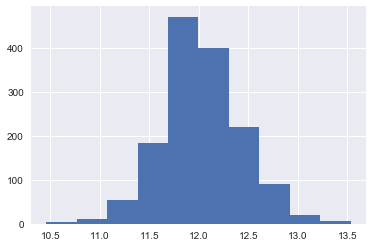

In [124]:
np.log(y).hist()

In [128]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
r = cross_val_score(lr, X,np.log(y),cv=5)
r.mean()

-9.4252617337305451e+24